In [1]:
pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [44 lines of output]
  Traceback (most recent call last):
    File "C:\Users\RAM_ANURAG\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = _parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\RAM_ANURAG\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\RAM_ANURAG\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\RAM_ANURAG\anaconda3\Lib\site-pa

In [2]:
!pip install keras


In [3]:
!pip  install tensorflow

## Recognizing Alphabets in Hindi and English:
    
  

# Import Necessary Libraries

In [4]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import os
from IPython.display import display, Image
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

In [5]:
train_path="C:/Users/RAM_ANURAG/Downloads/Own_Datasets/Train"
test_path="C:/Users/RAM_ANURAG/Downloads/Own_Datasets/Test"

In [6]:
train_files = os.listdir(train_path)
test_files  = os.listdir(test_path)

In [8]:
# Count the number of files on train
num_files_train = len(train_files)
num_files_train

62

In [7]:
# Count the number of files on test
num_files_test = len(train_files)
num_files_test

62

###  Dataset Generation Using TensorFlow

In [9]:
# Generate train dataset
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    image_size=(32, 32),  #Resizes images to a consistent size of 32x32 pixels.
    batch_size=32,        #Forms batches of 32 images for efficient training.
    label_mode='categorical',  
    shuffle=True,         # Shuffles the dataset to enhance model learning.
    interpolation="lanczos5"  #Specifies the interpolation method for resizing.
)

# Generate test dataset
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size=(32, 32),
    batch_size=32,
    label_mode='categorical',
    shuffle=True,
    interpolation="lanczos5"
)

Found 61701 files belonging to 62 classes.
Found 11060 files belonging to 62 classes.


###  The dataset contains 61,701 training images and 11,060 testing images, covering 62 classes representing Hindi and English alphabets.

In [11]:
# defining class names and printing them
class_names = train_data.class_names
print(class_names)

['a', 'b', 'c', 'character_10_yna', 'character_11_taamatar', 'character_12_thaa', 'character_13_daa', 'character_14_dhaa', 'character_15_adna', 'character_16_tabala', 'character_17_tha', 'character_18_da', 'character_19_dha', 'character_1_ka', 'character_20_na', 'character_21_pa', 'character_22_pha', 'character_23_ba', 'character_24_bha', 'character_25_ma', 'character_26_yaw', 'character_27_ra', 'character_28_la', 'character_29_waw', 'character_2_kha', 'character_30_motosaw', 'character_31_petchiryakha', 'character_32_patalosaw', 'character_33_ha', 'character_34_chhya', 'character_35_tra', 'character_36_gya', 'character_3_ga', 'character_4_gha', 'character_5_kna', 'character_6_cha', 'character_7_chha', 'character_8_ja', 'character_9_jha', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [12]:
len(class_names)

62

# Normalization

In [13]:
def normalize_image(image, label):
    return tf.cast(image / 255.0, tf.float32), label

In [14]:
#train_data = train_data.map(lambda image, label: normalize_image(image, label))
#test_data = test_data.map(lambda image, label: normalize_image(image, label))
train_data=train_data.map(normalize_image)
test_data=test_data.map(normalize_image)

In [15]:
train_image_shape = train_data.element_spec[0].shape
print("Shape of normalized images in train_data:", train_image_shape)

# Find the shape of the normalized images in test_data
test_image_shape = test_data.element_spec[0].shape
print("Shape of normalized images in test_data:", test_image_shape)

Shape of normalized images in train_data: (None, 32, 32, 3)
Shape of normalized images in test_data: (None, 32, 32, 3)


### Displaying Sample Images with Corresponding Alphabet Labels

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

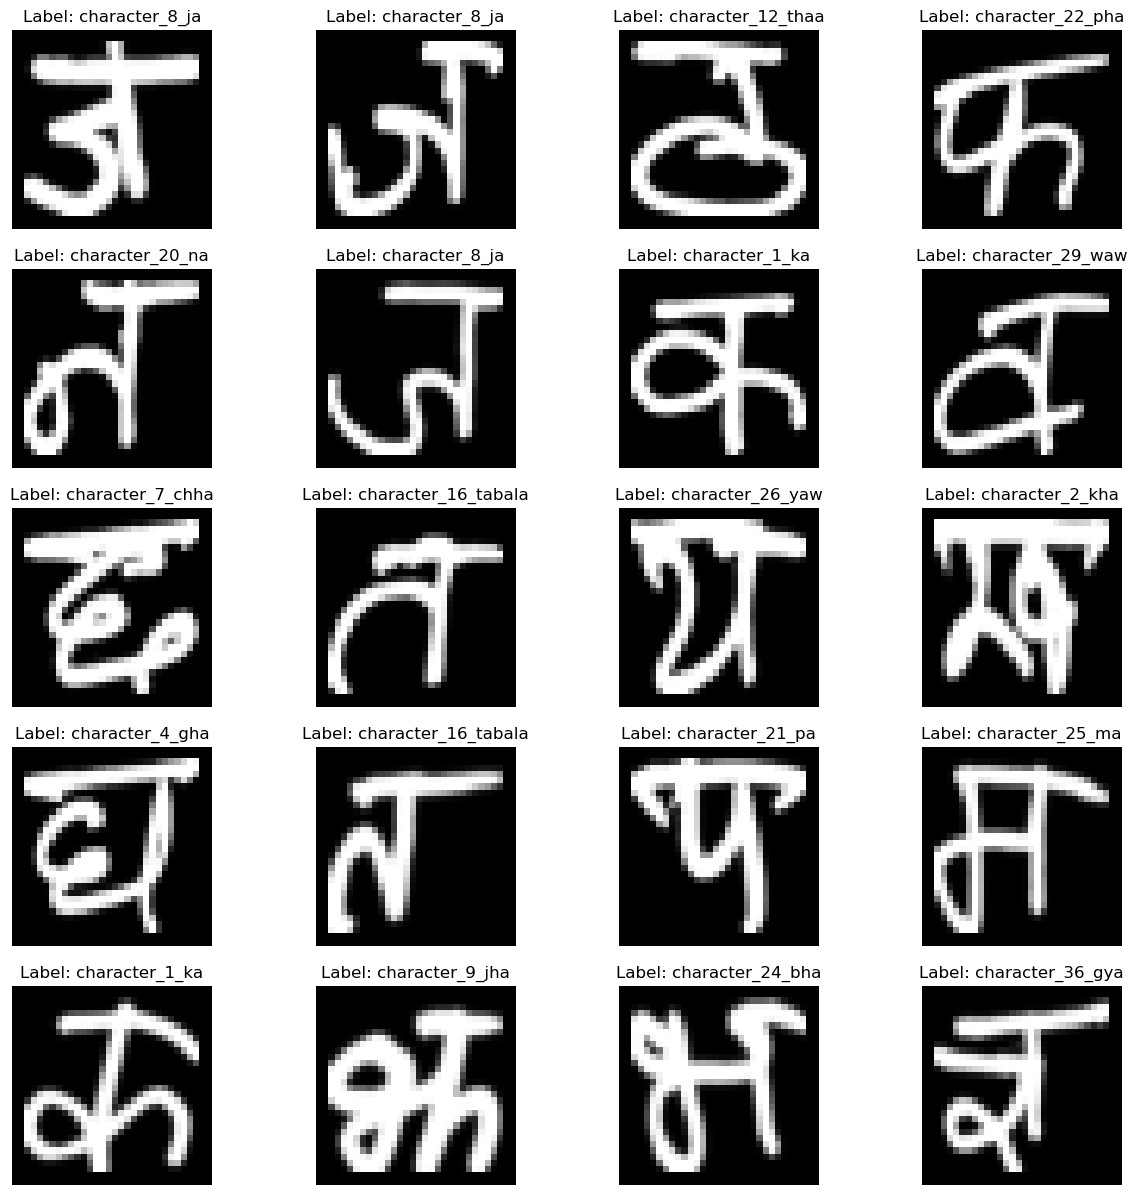

In [16]:

for images, labels in train_data.take(1):
    plt.figure(figsize=(15, 15))
    for i in range(20):
        plt.subplot(5, 4, i + 1)
        plt.imshow(images[i].numpy())
        class_index = tf.argmax(labels[i]).numpy()
        class_name = class_names[class_index]
        plt.title(f"Label: {class_name}")
        plt.axis("off")
    plt.show()

# Model Building:CNN Model

In [17]:
# import the necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# create the model object
model = Sequential()

# add the first convolutional layer
model.add(Convolution2D(32, (3,3), strides=1, activation="relu", input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same"))

# add the second convolutional layer
model.add(Convolution2D(64, (3,3), strides=1, activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same"))


# add the third convolutional layer
model.add(Convolution2D(128, (3,3), strides=1, activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same"))

# add the fourth convolutional layer
model.add(Convolution2D(256, (3,3), strides=1, activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same"))

# flatten the output of the last convolutional layer
model.add(Flatten())

# add the first dense layer with weight decay regularization
model.add(Dense(256, activation="relu", kernel_initializer="uniform", kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# add the second dense layer with weight decay regularization
model.add(Dense(128, activation="relu", kernel_initializer="uniform", kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# add the output layer with softmax activation function
model.add(Dense(62, activation="softmax", kernel_initializer="uniform"))

# compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# print the model summary
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 64)        256       
 chNormalization)                                                
                                                        

### Model Architecture:

The CNN architecture is composed of convolutional layers for feature extraction and dense layers for classification.
Convolutional layers (with ReLU activation) capture hierarchical features in the input images.

###  Batch Normalization:

Batch normalization layers are inserted after each convolutional layer to improve training stability and accelerate convergence.

### Max Pooling:

Max pooling layers are utilized to downsample the spatial dimensions of the feature maps, reducing computation and extracting dominant features.

### Dropout:

Dropout layers with a dropout rate of 0.5 are added after dense layers to prevent overfitting by randomly deactivating neurons during training.

### Weight Decay Regularization:

L2 regularization is applied to the dense layers, controlling overfitting by penalizing large weights.

### Output Layer:

The output layer uses the softmax activation function for multiclass classification, producing probabilities for each class (62 classes in this case).

### Model Compilation:

The model is compiled using the Adam optimizer and categorical crossentropy loss, while accuracy is chosen as the evaluation metric.

In [18]:
history=model.fit(train_data, epochs=10, validation_data=test_data)

Epoch 1/10
1929/1929 [==============================] - 304s 154ms/step - loss: 1.1007 - accuracy: 0.8151 - val_loss: 0.6219 - val_accuracy: 0.9179
Epoch 2/10
1929/1929 [==============================] - 128s 66ms/step - loss: 0.5893 - accuracy: 0.9229 - val_loss: 0.6704 - val_accuracy: 0.9249
Epoch 3/10
1929/1929 [==============================] - 127s 66ms/step - loss: 0.5219 - accuracy: 0.9400 - val_loss: 0.4719 - val_accuracy: 0.9601
Epoch 4/10
1929/1929 [==============================] - 127s 66ms/step - loss: 0.5030 - accuracy: 0.9471 - val_loss: 0.4857 - val_accuracy: 0.9540
Epoch 5/10
1929/1929 [==============================] - 131s 68ms/step - loss: 0.4537 - accuracy: 0.9564 - val_loss: 0.4998 - val_accuracy: 0.9612
Epoch 6/10
1929/1929 [==============================] - 134s 69ms/step - loss: 0.4468 - accuracy: 0.9581 - val_loss: 0.4594 - val_accuracy: 0.9656
Epoch 7/10
1929/1929 [==============================] - 131s 68ms/step - loss: 0.4235 - accuracy: 0.9626 - val_loss: 

In [19]:
model.evaluate(test_data)

346/346 [==============================] - 9s 26ms/step - loss: 0.4285 - accuracy: 0.9699


[0.4284936487674713, 0.9698914885520935]

###  The model achieved a notable training accuracy of approximately 96.84% over 10 epochs, demonstrating effective learning on the training dataset. Additionally, the testing accuracy reached approximately 96.98%, affirming the model's ability to generalize well to unseen data. These results indicate the successful training and robust performance of the alphabet recognition model.

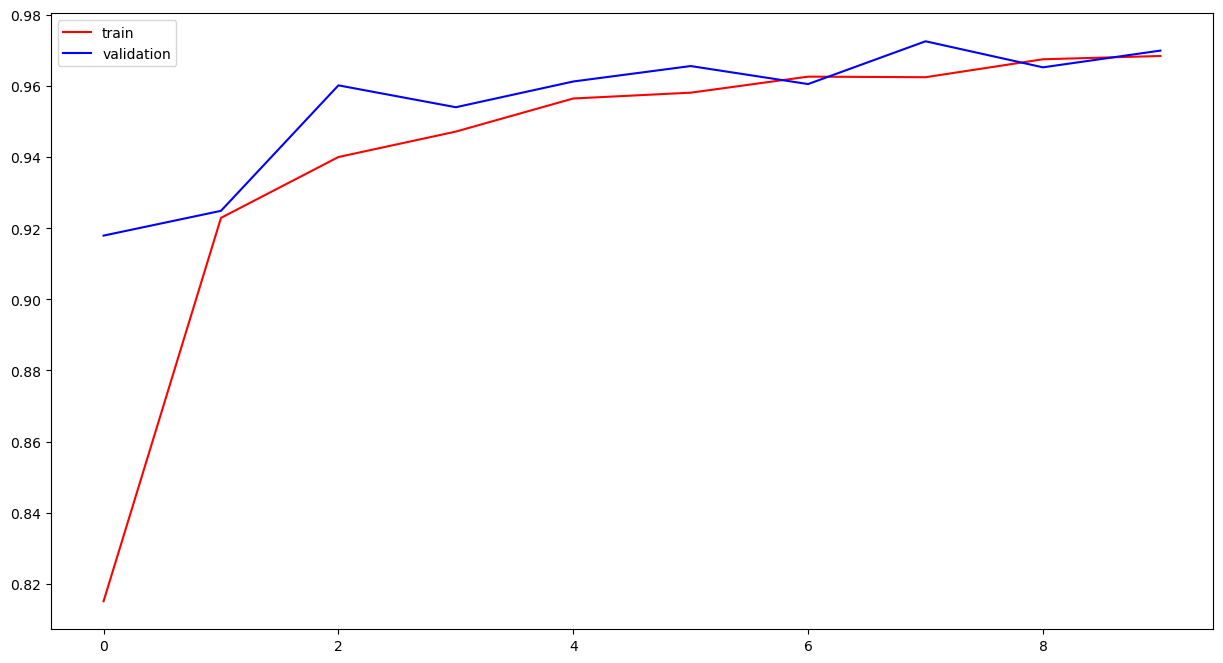

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plt.plot(history.history['accuracy'],color='red',label='train')

plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()
     
    
    

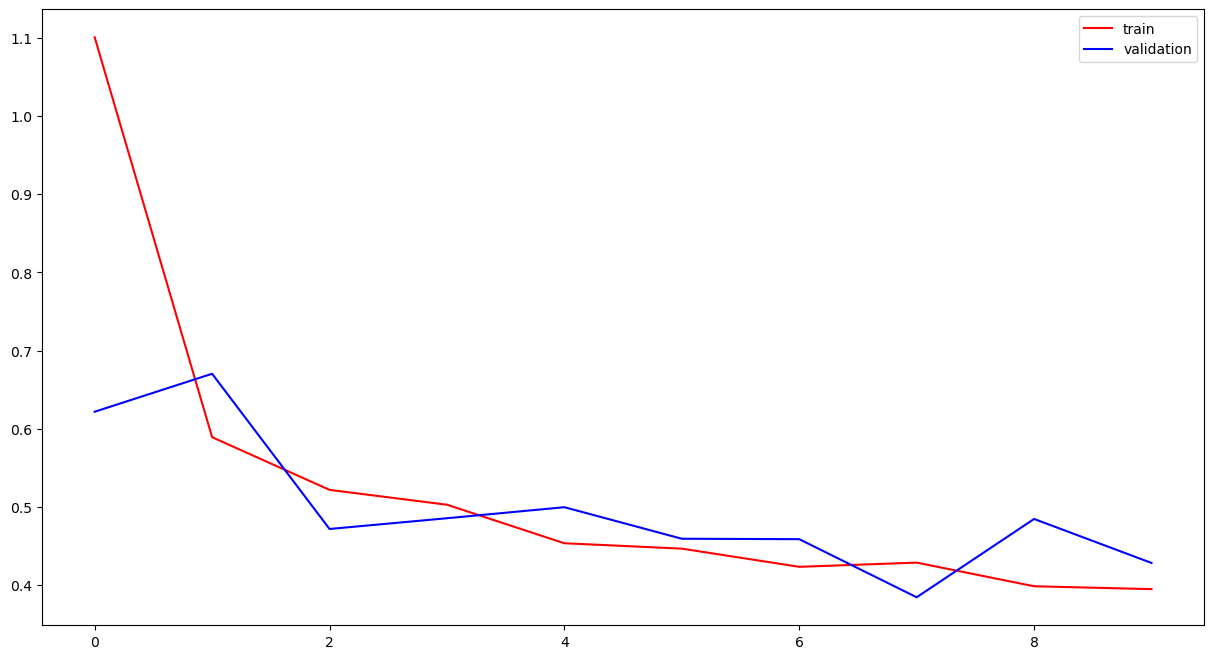

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()
     

# Plotting Actual Vs Predicted

1/1 [==============================] - 0s 43ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

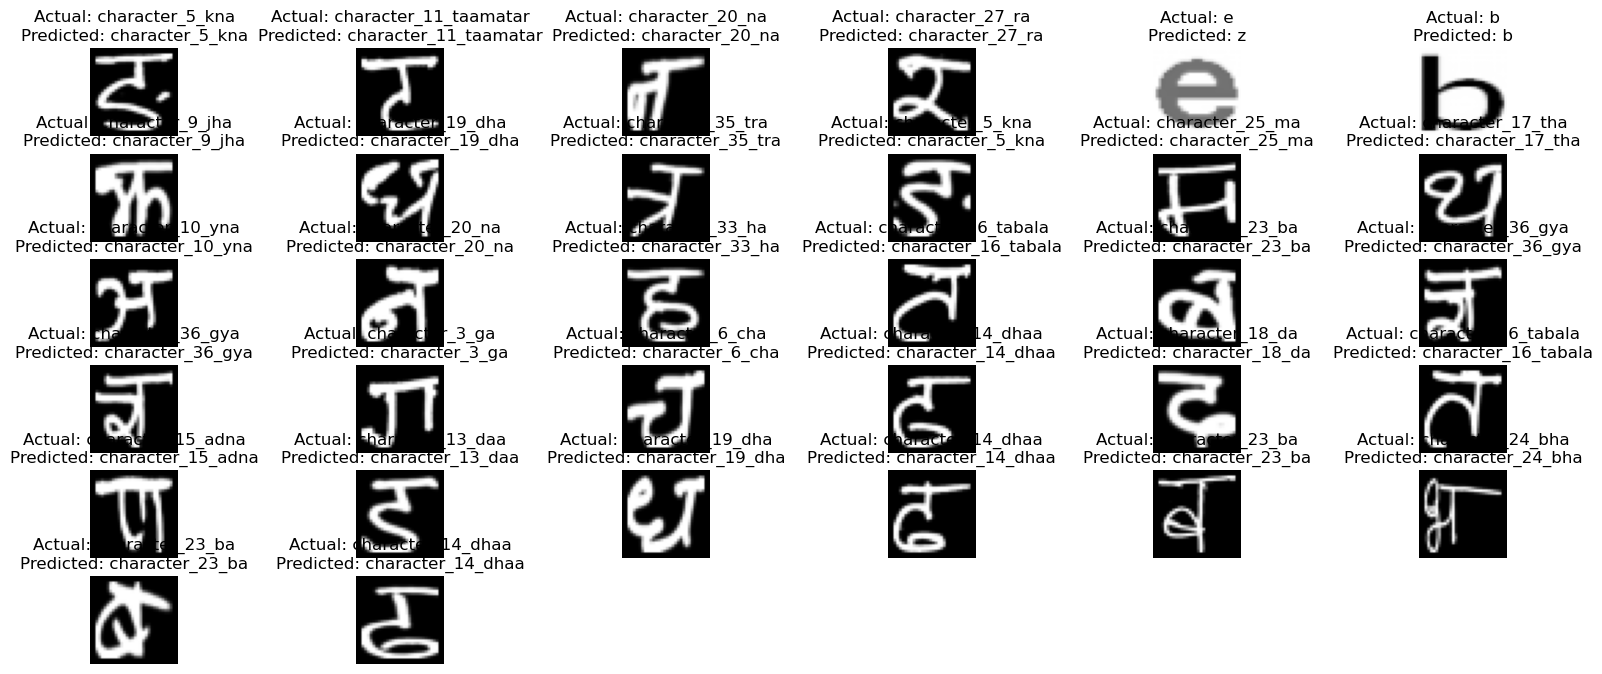

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Load a batch of test data
for images, labels in test_data.take(1):
    # Normalize the images
    images = images.numpy()

    # Make predictions
    predictions = model.predict(images)

    # Convert one-hot encoded labels to class indices
    actual_indices = np.argmax(labels, axis=1)

    # Convert actual class indices to class names
    actual_labels = [class_names[idx] for idx in actual_indices]

    # Get predicted class indices
    predicted_indices = np.argmax(predictions, axis=1)

    # Convert predicted class indices to class names
    predicted_labels = [class_names[idx] for idx in predicted_indices]

    # Display the images with both actual and predicted labels
    plt.figure(figsize=(20, 8))
    for i in range(32):  # Display the first 16 images
        plt.subplot(6, 6, i + 1)
        plt.imshow(images[i])
        plt.title(f'Actual: {actual_labels[i]}\nPredicted: {predicted_labels[i]}')
        plt.axis('off')

    plt.show()


In [28]:
# Save the model architecture and weights
model.save('model.h5')


In [23]:
# save the Normalize_image function in pickle
import joblib
joblib.dump(normalize_image, 'normalize_image.pkl')


['normalize_image.pkl']

In [26]:
!pip install streamlit

In [57]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image

# Load the trained model
model = tf.keras.models.load_model('model.h5')

# Define class names
class_names = ['a', 'b', 'c', 'character_10_yna', 'character_11_taamatar', 'character_12_thaa', 'character_13_daa',
               'character_14_dhaa', 'character_15_adna', 'character_16_tabala', 'character_17_tha', 'character_18_da',
               'character_19_dha', 'character_1_ka', 'character_20_na', 'character_21_pa', 'character_22_pha',
               'character_23_ba', 'character_24_bha', 'character_25_ma', 'character_26_yaw', 'character_27_ra',
               'character_28_la', 'character_29_waw', 'character_2_kha', 'character_30_motosaw', 'character_31_petchiryakha',
               'character_32_patalosaw', 'character_33_ha', 'character_34_chhya', 'character_35_tra', 'character_36_gya',
               'character_3_ga', 'character_4_gha', 'character_5_kna', 'character_6_cha', 'character_7_chha',
               'character_8_ja', 'character_9_jha', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q',
               'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

# Streamlit app
st.title("Handwritten Hindi-English Letter Recognition App")

uploaded_file = st.file_uploader("Choose a handwritten image...", type="png")
# ...

# ...

if uploaded_file is not None:
    # Display the uploaded image
    st.image(uploaded_file, caption="Uploaded Image", use_column_width=True)

    # Preprocess the image
    image = Image.open(uploaded_file)
    image = image.resize((32, 32))  # Resize to (32, 32)
    image_array = np.asarray(image)
    image_array = image_array / 255.0
    image_array = np.expand_dims(image_array, axis=-1)  # Add channel dimension for grayscale

    if image_array.shape[-1] == 1:
        # Convert grayscale to RGB
        image_array = np.concatenate([image_array, image_array, image_array], axis=-1)

    image_array = tf.convert_to_tensor(image_array, dtype=tf.float32)  # Convert to tf.Tensor
    image_array = tf.expand_dims(image_array, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model.predict(image_array)
    predicted_class = class_names[np.argmax(prediction)]

    # Display the prediction
    st.write(f"Prediction: {predicted_class}")


Overwriting app.py


In [ ]:
!streamlit run app.py
